參考:
* https://medium.com/@hupinwei/python-%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-24f7e826fca9
* https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python
* https://www.kaggle.com/code/apapiu/regularized-linear-models
* https://blog.csdn.net/weixin_43298886/article/details/109523109
* https://www.kaggle.com/code/kirillchekmenev/house-price-prediction-top-150

In [17]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [18]:
# check how many columns
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [19]:
#descriptive statistics summary
# to understand the distribution of the saleprice
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

常態分布的好處為:  
* 現實生活的案例可能更貼近常態分布，因此用常態分布不但好分析，也不容易失去一般性。

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'log(price + 1)'}>]], dtype=object)

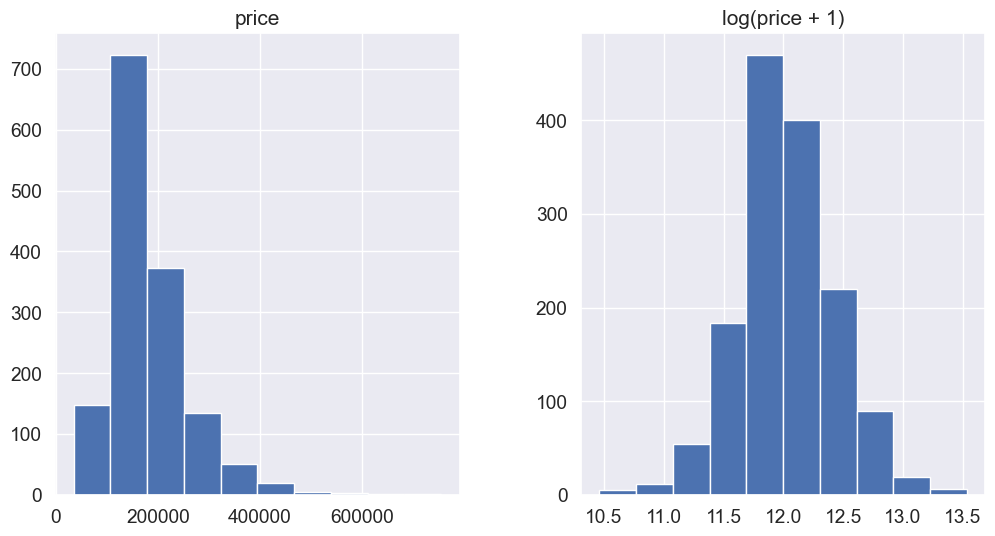

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# 將saleprice從skew-distribution轉為normal-distribution
# log (1 + p)
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":df["SalePrice"], "log(price + 1)":np.log1p(df["SalePrice"])})
prices.hist()

In [21]:
from scipy.stats import skew
#log transform the target:
df["SalePrice"] = np.log1p(df["SalePrice"])

# 沒有引入ID是因為ID僅代表序列，對於預測房價沒有幫助
features = df.drop(['Id','SalePrice'], axis=1)
prices = df['SalePrice']

#log transform skewed numeric features:
# 因為偏斜值容易影響模型的預測結果，所以要將偏斜值大於0.75的數值做log轉換 (轉換成近似常態分佈)
numeric_feats = features.dtypes[features.dtypes != "object"].index

skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

features[skewed_feats] = np.log1p(features[skewed_feats])

分析缺失值比例

In [22]:
#missing data
total = features.isnull().sum().sort_values(ascending=False)  # total number of missing data
percent = (features.isnull().sum()/features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageType       81  0.055479
GarageYrBlt      81  0.055479
GarageQual       81  0.055479
GarageCond       81  0.055479
GarageFinish     81  0.055479
BsmtFinType2     38  0.026027
BsmtExposure     38  0.026027
BsmtCond         37  0.025342
BsmtFinType1     37  0.025342
BsmtQual         37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685
BedroomAbvGr      0  0.000000

那發現有些欄位缺失值特別多，例如`PoolQC`(游泳池相關的變數)，按常理想，游泳池可能會影響，但有些房子又不一定有游泳池，因此游泳池可能不是影響房價的關鍵。  
  
接下來用`相關係數矩陣`看看那些變因會是主要影響因素

<Axes: >

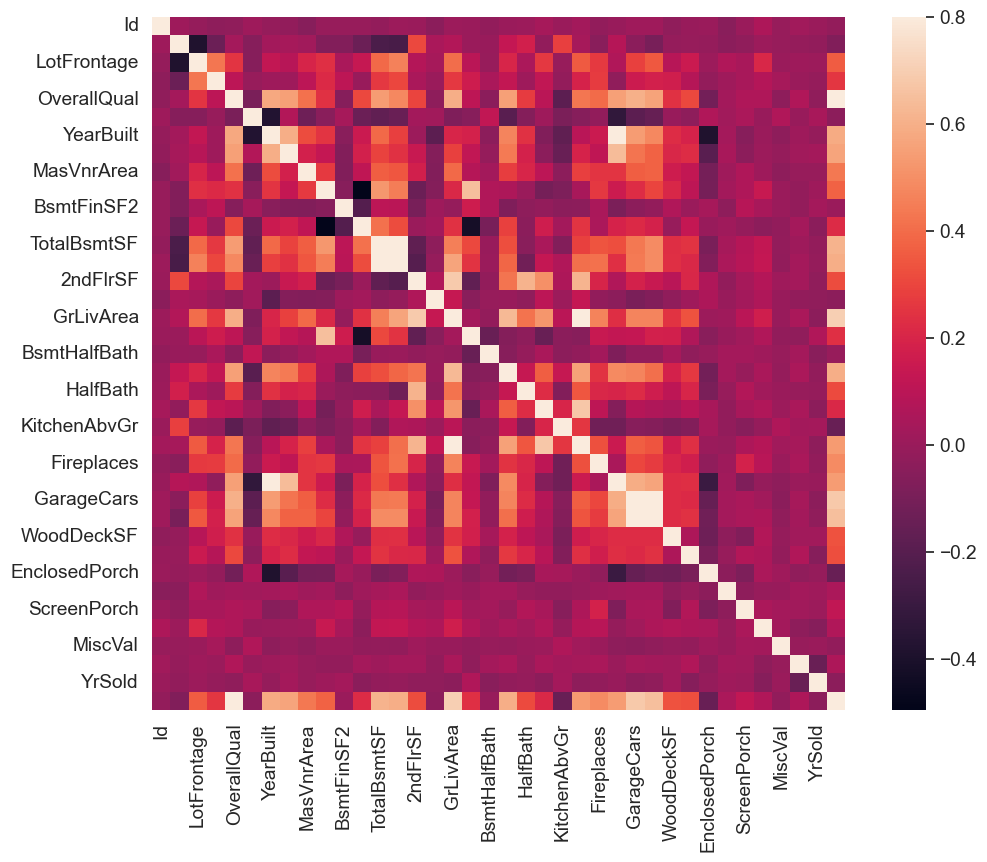

In [23]:
import seaborn as sns
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

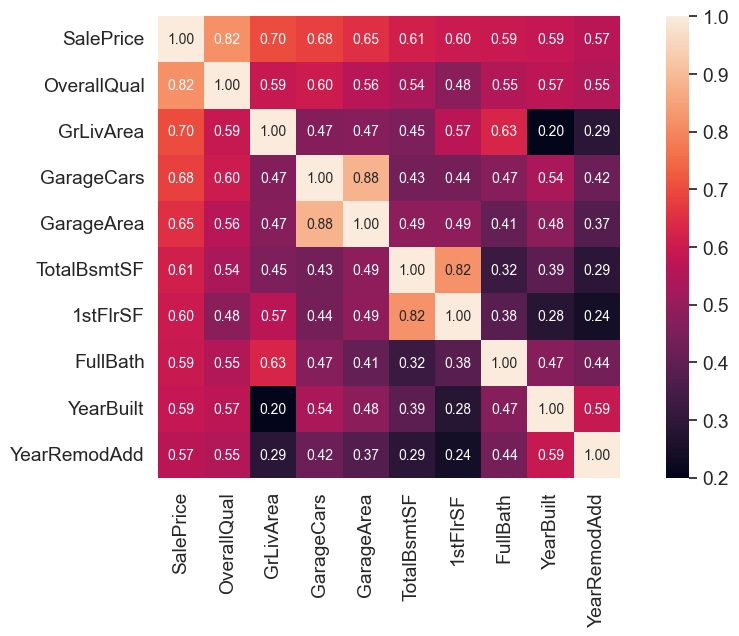

In [24]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set_theme(font_scale=1.25)
hm = sns.heatmap(cm,                        # col val
                 cbar=True,                 # some paramter      
                 annot=True, square=True,   # some paramter
                 fmt='.2f',                 # format, fmt
                 annot_kws={'size': 10},    # anoo size
                 yticklabels=cols.values,   # y val
                 xticklabels=cols.values)   # v val
plt.show()

可以設20%為界線，超過的就刪掉不看，低於20%的缺失值填補辦法則是填那欄的平均值。

In [25]:
del_col = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
features = features.drop(del_col, axis=1)
# 选择数值列
numeric_cols = features.select_dtypes(include=['number'])
# 填充缺失值
numeric_cols_filled = numeric_cols.fillna(numeric_cols.mean())
# 将填充后的数值列与非数值列合并
features = pd.concat([numeric_cols_filled, features.select_dtypes(exclude=['number'])], axis=1)

features.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    4.110874     4.189655  9.042040            7            5       2003   
1    3.044522     4.394449  9.169623            6            8       1976   
2    4.110874     4.234107  9.328212            7            5       2001   
3    4.262680     4.110874  9.164401            7            5       1915   
4    4.110874     4.442651  9.565284            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  Electrical  \
0          2003    5.283204    6.561031         0.0  ...       SBrkr   
1          1976    0.000000    6.886532         0.0  ...       SBrkr   
2          2002    5.093750    6.188264         0.0  ...       SBrkr   
3          1970    0.000000    5.379897         0.0  ...       SBrkr   
4          2000    5.860786    6.486161         0.0  ...       SBrkr   

   KitchenQual  Functional  GarageType  GarageFinish  GarageQual  GarageCond  \
0           Gd         Typ      Attchd           RFn          TA          TA   
1           TA         Typ      Attchd           RFn          TA          TA   
2           Gd         Typ      Attchd           RFn          TA          TA   
3           Gd         Typ      Detchd           Unf          TA          TA   
4           Gd         Typ      Attchd           RFn          TA          TA   

   PavedDrive  SaleType  SaleCondition  
0           Y        WD         Normal  
1           Y        WD         Normal  
2           Y        WD         Normal  
3           Y        WD        Abnorml  
4           Y        WD         Normal  

[5 rows x 74 columns]

類別資料

知道分布狀況

In [26]:
# Visualization
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

def cat_summary(dataframe, col_name):
    counts = dataframe[col_name].value_counts() # 資料,個數
    ratios = 100 * counts / len(dataframe)

    # Create subplots with specific types for each subplot
    fig = make_subplots(
        rows=1, cols=3, 
        subplot_titles=(
            f'Frequency of {col_name}',
            f'SalePrice vs {col_name}', 
            f'YearBuilt vs {col_name}'
        ),
    )

    # Count Plot
    fig.add_trace(go.Bar(
        x=counts.index,
        y=counts.values,
        text=[f'{ratio:.2f}%' for ratio in ratios],
        textposition='inside',
    ), row=1, col=1)    

    # Box Plot for SalePrice
    saleprice_box = px.box(dataframe, x=col_name, y='SalePrice')
    for trace in saleprice_box['data']:
        fig.add_trace(trace, row=1, col=2)

    # Box Plot for YearBuilt
    yearbuilt_box = px.box(dataframe, x=col_name, y='YearBuilt')
    for trace in yearbuilt_box['data']:
        fig.add_trace(trace, row=1, col=3)

    # Update layout for better appearance
    fig.update_layout(
        title_text=f'Summary for {col_name}',
        showlegend=False,
    )

    # Update x-axis labels
    fig.update_xaxes(title_text=col_name, row=2, col=1)
    fig.update_xaxes(title_text=col_name, row=2, col=2)

    fig.show()

In [27]:
# or plot all
categorical_columns = features.select_dtypes(include=['object']) 
for categorical_column in categorical_columns.columns:
    cat_summary(df, categorical_column)

推測: 類別間的資料具有某種順序關係，意思為某個特徵較容易出現。

In [28]:
categorical_columns = features.select_dtypes(exclude=["number"]).columns
categorical_sequential_columns = dict()
def cat_seqence(dataframe, col_name):
    for col in col_name:
        counts = dataframe[col].value_counts() # 資料,個數
        categorical_sequential_columns[col] = counts.index.tolist()

cat_seqence(df, categorical_columns)
print(categorical_sequential_columns)

{'MSZoning': ['RL', 'RM', 'FV', 'RH', 'C (all)'], 'Street': ['Pave', 'Grvl'], 'LotShape': ['Reg', 'IR1', 'IR2', 'IR3'], 'LandContour': ['Lvl', 'Bnk', 'HLS', 'Low'], 'Utilities': ['AllPub', 'NoSeWa'], 'LotConfig': ['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3'], 'LandSlope': ['Gtl', 'Mod', 'Sev'], 'Neighborhood': ['NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Somerst', 'Gilbert', 'NridgHt', 'Sawyer', 'NWAmes', 'SawyerW', 'BrkSide', 'Crawfor', 'Mitchel', 'NoRidge', 'Timber', 'IDOTRR', 'ClearCr', 'StoneBr', 'SWISU', 'MeadowV', 'Blmngtn', 'BrDale', 'Veenker', 'NPkVill', 'Blueste'], 'Condition1': ['Norm', 'Feedr', 'Artery', 'RRAn', 'PosN', 'RRAe', 'PosA', 'RRNn', 'RRNe'], 'Condition2': ['Norm', 'Feedr', 'Artery', 'RRNn', 'PosN', 'PosA', 'RRAn', 'RRAe'], 'BldgType': ['1Fam', 'TwnhsE', 'Duplex', 'Twnhs', '2fmCon'], 'HouseStyle': ['1Story', '2Story', '1.5Fin', 'SLvl', 'SFoyer', '1.5Unf', '2.5Unf', '2.5Fin'], 'RoofStyle': ['Gable', 'Hip', 'Flat', 'Gambrel', 'Mansard', 'Shed'], 'RoofMatl': ['CompShg'

Label encoding

In [29]:
from sklearn.preprocessing import LabelEncoder

lebel_encoding = LabelEncoder()

for col, order in categorical_sequential_columns.items():
    # 將類別順序應用於列
    features[col] = pd.Categorical(features[col], categories=order, ordered=True)
    # 按指定順序轉成label encoding
    features[col] = lebel_encoding.fit_transform(features[col])

features.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    4.110874     4.189655  9.042040            7            5       2003   
1    3.044522     4.394449  9.169623            6            8       1976   
2    4.110874     4.234107  9.328212            7            5       2001   
3    4.262680     4.110874  9.164401            7            5       1915   
4    4.110874     4.442651  9.565284            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  Electrical  \
0          2003    5.283204    6.561031         0.0  ...           4   
1          1976    0.000000    6.886532         0.0  ...           4   
2          2002    5.093750    6.188264         0.0  ...           4   
3          1970    0.000000    5.379897         0.0  ...           4   
4          2000    5.860786    6.486161         0.0  ...           4   

   KitchenQual  Functional  GarageType  GarageFinish  GarageQual  GarageCond  \
0            2           6           1             1           4           4   
1            3           6           1             1           4           4   
2            2           6           1             1           4           4   
3            2           6           5             2           4           4   
4            2           6           1             1           4           4   

   PavedDrive  SaleType  SaleCondition  
0           2         8              4  
1           2         8              4  
2           2         8              4  
3           2         8              0  
4           2         8              4  

[5 rows x 74 columns]

讀取測試資料

In [30]:
df2 = pd.read_csv('test.csv')
X_test = df2.loc[: , 'MSSubClass':]

# log transform the skewed features
numeric_feats = X_test.dtypes[X_test.dtypes != "object"].index

skewed_feats = X_test[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

X_test[skewed_feats] = np.log1p(X_test[skewed_feats])

#missing data
del_col = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
X_test = X_test.drop(del_col, axis=1)
# 选择数值列
numeric_cols = X_test.select_dtypes(include=['number'])
# 填充缺失值
numeric_cols_filled = numeric_cols.fillna(numeric_cols.mean())
# 将填充后的数值列与非数值列合并
X_test = pd.concat([numeric_cols_filled, X_test.select_dtypes(exclude=['number'])], axis=1)

#label encoding
lebel_encoding = LabelEncoder()

for col, order in categorical_sequential_columns.items():
    # 將類別順序應用於列
    X_test[col] = pd.Categorical(X_test[col], categories=order, ordered=True)
    # 按指定順序轉成label encoding
    X_test[col] = lebel_encoding.fit_transform(X_test[col])

X_test.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    3.044522         80.0  9.360741            5            6       1961   
1    3.044522         81.0  9.565775            6            6       1958   
2    4.110874         74.0  9.534668            5            5       1997   
3    4.110874         78.0  9.208238            6            6       1998   
4    4.795791         43.0  8.518392            8            5       1992   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  Electrical  \
0          1961    0.000000    6.150603    4.976734  ...           3   
1          1958    4.691348    6.828712    0.000000  ...           3   
2          1998    0.000000    6.674561    0.000000  ...           3   
3          1998    3.044522    6.401917    0.000000  ...           3   
4          1992    0.000000    5.575949    0.000000  ...           3   

   KitchenQual  Functional  GarageType  GarageFinish  GarageQual  GarageCond  \
0            3           6           1             2           3           4   
1            2           6           1             2           3           4   
2            3           6           1             0           3           4   
3            2           6           1             0           3           4   
4            2           6           1             1           3           4   

   PavedDrive  SaleType  SaleCondition  
0           2         8              4  
1           2         8              4  
2           2         8              4  
3           2         8              4  
4           2         8              4  

[5 rows x 74 columns]

model: Xgboost

In [31]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(features, prices, 
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=0)

# 讀取數據 (DMatrix為xgboost專用的數據格式，可以優化訓練過程)
dtrain = xgb.DMatrix(X_train, label = y_train)
dvalid = xgb.DMatrix(X_valid, label = y_valid)
dtest = xgb.DMatrix(X_test)

# 設置參數
params = {
    "max_depth":5, 
    "eta":0.1, 
    "colsample_bytree":0.8, 
    "subsample":0.8, 
    "objective": "reg:squarederror"  # 設置為回歸任務
}
# 訓練模型
model = xgb.train(params=params, dtrain=dtrain,  num_boost_round=500, 
                  early_stopping_rounds=100, evals=[(dvalid, 'valid')])

# 預測
result = model.predict(dtest)

[0]	valid-rmse:0.35742
[1]	valid-rmse:0.32996
[2]	valid-rmse:0.30789
[3]	valid-rmse:0.28624
[4]	valid-rmse:0.26778
[5]	valid-rmse:0.24974
[6]	valid-rmse:0.23463
[7]	valid-rmse:0.22160
[8]	valid-rmse:0.20889
[9]	valid-rmse:0.19814
[10]	valid-rmse:0.18998
[11]	valid-rmse:0.18260
[12]	valid-rmse:0.17527
[13]	valid-rmse:0.17028
[14]	valid-rmse:0.16496
[15]	valid-rmse:0.16024
[16]	valid-rmse:0.15640
[17]	valid-rmse:0.15323
[18]	valid-rmse:0.15056
[19]	valid-rmse:0.14858
[20]	valid-rmse:0.14668
[21]	valid-rmse:0.14469
[22]	valid-rmse:0.14346
[23]	valid-rmse:0.14238
[24]	valid-rmse:0.14070
[25]	valid-rmse:0.13958
[26]	valid-rmse:0.13875
[27]	valid-rmse:0.13777
[28]	valid-rmse:0.13693
[29]	valid-rmse:0.13624
[30]	valid-rmse:0.13562
[31]	valid-rmse:0.13531
[32]	valid-rmse:0.13491
[33]	valid-rmse:0.13432
[34]	valid-rmse:0.13377
[35]	valid-rmse:0.13327
[36]	valid-rmse:0.13319
[37]	valid-rmse:0.13266
[38]	valid-rmse:0.13217
[39]	valid-rmse:0.13163
[40]	valid-rmse:0.13122
[41]	valid-rmse:0.13097
[4

In [32]:
result = np.expm1(result)   # 將log轉換回原始數值
res = pd.DataFrame({'Id': df2['Id'], 'SalePrice': (result)})
res.to_csv('submission.csv', index=False)

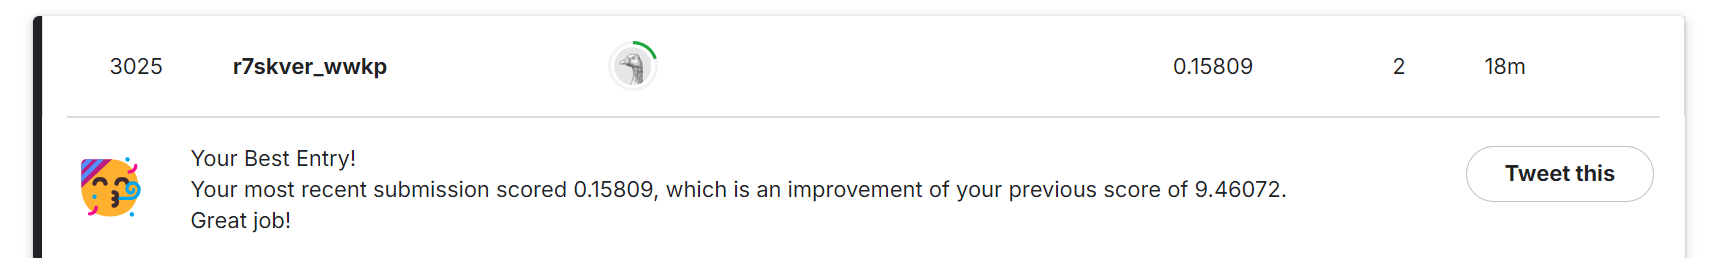